In [433]:
from pgmpy.models import MarkovModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [313]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [689]:
## define a probability distribution over each pair of varaibles
def Esp_Money_Market_Conditional_Probabilities(month_number):
    """Returns the conditions probabilities of money market and every other ESP product.
    Compute the probabilities distribution of money market = yes and moeny market = 0 no, then take the
    complement to find the corresponding probabilities for the other class.
    
    Returns a dictionary of each probabilitiy distribution given the time"""
    # money market bonus conditional probability distributions
#     mmb1_and_cmma1_dist = stats.norm(loc = 5, scale=2)
#     mmb1_and_cmma0_dist = stats.norm(loc = 86, scale=20)
#     mmb1_and_checking1_dist = stats.norm(loc = 25, scale=10)
#     mmb1_and_checking0_dist = stats.norm(loc = 5, scale=1)
#     mmb1_and_cm1_dist = stats.norm(loc = 9, scale=5)
#     mmb1_and_cm0_dist = stats.norm(loc = 8, scale=21)
#     mmb1_and_fx1_dist = stats.norm(loc = 15, scale=55)
#     mmb1_and_fx0_dist = stats.norm(loc = 7, scale=55)
#     mmb1_and_loc1_dist = stats.norm(loc = 10, scale=25)
#     mmb1_and_loc0_dist = stats.norm(loc = 1.2, scale=21)
#     mmb1_and_es1_dist = stats.norm(loc = .7, scale=95)
#     mmb1_and_es0_dist = stats.norm(loc = 8, scale=55)
######## TAKE HISTORICAL PROBABILITIES FOR EACH TIME STEP#######

    mmb1_dist = stats.norm(loc = 5, scale=2)
    mmb1_prob = mmb1_dist.pdf(month_number)
    mmb0_prob =  1 - mmb1_prob
    
    cmma1_dist = stats.norm(loc = 5, scale=1)
    cmma1_prob = cmma1_dist.pdf(month_number)
    cmma0_prob = 1-cmma1_prob
    
    checking1_dist = stats.norm(loc = 4, scale=11)
    checking1_prob = checking1_dist.pdf(month_number)
    checking0_prob = 1 - checking1_prob 
    
    cm1_dist = stats.norm(loc = 20, scale=5)
    cm1_prob = cm1_dist.pdf(month_number)
    cm0_prob = 1 - cm1_prob
    
    
    fx1_dist = stats.norm(loc = 15, scale=2)
    fx1_prob = fx1_dist.pdf(month_number)
    fx0_prob = 1 - fx1_prob
    
    loc1_dist = stats.norm(loc = 10, scale=15)
    loc1_prob = loc1_dist.pdf(month_number)
    loc0_prob = 1 - loc1_prob
    
    es1_dist = stats.norm(loc = .7, scale=15)
    es1_prob = es1_dist.pdf(month_number)
    es0_prob = 1 - es1_prob
    
    
    
    # find the probabilities given a month number for money market bonus
#     mmb1_cmma1 = mmb1_and_cmma1_dist.pdf(month_number)
#     mmb0_cmma1 = 1-mmb1_cmma1
#     mmb1_cmma0 = mmb1_and_cmma0_dist.pdf(month_number)
#     mmb0_cmma0 = 1-mmb1_cmma0
    
#     mmb1_checking1 = mmb1_and_checking1_dist.pdf(month_number)
#     mmb0_checking1 = 1 - mmb1_checking1
#     mmb1_checking0 = mmb1_and_checking0_dist.pdf(month_number)
#     mmb0_checking0 = 1-mmb1_checking0
    
#     mmb1_cm1 = mmb1_and_cm1_dist.pdf(month_number)
#     mmb0_cm1 = 1 - mmb1_cm1
#     mmb1_cm0 = mmb1_and_cm0_dist.pdf(month_number)
#     mmb0_cm0 = 1-mmb1_cm0
    
#     mmb1_fx1 = mmb1_and_fx1_dist.pdf(month_number)
#     mmb0_fx1 = 1 - mmb1_fx1
#     mmb1_fx0 = mmb1_and_fx0_dist.pdf(month_number)
#     mmb0_fx0 = 1-mmb1_fx0
    
#     mmb1_loc1 = mmb1_and_loc1_dist.pdf(month_number)
#     mmb0_loc1 = 1 - mmb1_loc1
#     mmb1_loc0 = mmb1_and_loc0_dist.pdf(month_number)
#     mmb0_loc0 = 1-mmb1_loc0
    
#     mmb1_es1 = mmb1_and_es1_dist.pdf(month_number)
#     mmb0_es1 = 1 - mmb1_es1
#     mmb1_es0 = mmb1_and_es0_dist.pdf(month_number)
#     mmb0_es0 = 1-mmb1_es0

    mmb1_cmma1 = mmb1_prob * cmma1_prob
    mmb0_cmma1 = mmb0_prob * cmma1_prob
    mmb1_cmma0 = mmb1_prob * cmma0_prob
    mmb0_cmma0 = mmb0_prob * cmma0_prob

    mmb1_checking1 = mmb1_prob * checking1_prob
    mmb0_checking1 = mmb0_prob * checking1_prob
    mmb1_checking0 = mmb1_prob * checking0_prob
    mmb0_checking0 = mmb0_prob * checking0_prob
    
    mmb1_cm1 = mmb1_prob * cm1_prob
    mmb0_cm1 = mmb0_prob * cm1_prob
    mmb1_cm0 = mmb1_prob * cm0_prob
    mmb0_cm0 = mmb0_prob * cm0_prob
    
    mmb1_fx1 = mmb1_prob * fx1_prob
    mmb0_fx1 = mmb0_prob * fx1_prob
    mmb1_fx0 = mmb1_prob * fx0_prob
    mmb0_fx0 = mmb0_prob * fx0_prob
    
    mmb1_loc1 = mmb1_prob * loc1_prob
    mmb0_loc1 = mmb0_prob * loc1_prob
    mmb1_loc0 = mmb1_prob * loc0_prob
    mmb0_loc0 = mmb0_prob * loc0_prob
    
    mmb1_es1 = mmb1_prob * es1_prob
    mmb0_es1 = mmb0_prob * es1_prob
    mmb1_es0 = mmb1_prob * es0_prob
    mmb0_es0 = mmb0_prob * es0_prob
    
    # return the probabilities in the form of a dictionary
    money_market_conditional_probabilities = {}
    money_market_conditional_probabilities['mmb1_cmma1'] = mmb1_cmma1
    money_market_conditional_probabilities['mmb1_cmma0'] = mmb1_cmma0
    money_market_conditional_probabilities['mmb0_cmma1'] = mmb0_cmma1
    money_market_conditional_probabilities['mmb0_cmma0'] = mmb0_cmma0
    
    money_market_conditional_probabilities['mmb1_checking1'] = mmb1_checking1
    money_market_conditional_probabilities['mmb1_checking0'] = mmb1_checking0
    money_market_conditional_probabilities['mmb0_checking1'] = mmb0_checking1
    money_market_conditional_probabilities['mmb0_checking0'] = mmb0_checking0
    
    money_market_conditional_probabilities['mmb1_cm1'] = mmb1_cm1
    money_market_conditional_probabilities['mmb1_cm0'] = mmb1_cm0
    money_market_conditional_probabilities['mmb0_cm1'] = mmb0_cm1
    money_market_conditional_probabilities['mmb0_cm0'] = mmb0_cm0
    
    money_market_conditional_probabilities['mmb1_fx1'] = mmb1_fx1
    money_market_conditional_probabilities['mmb1_fx0'] = mmb1_fx0
    money_market_conditional_probabilities['mmb0_fx1'] = mmb0_fx1
    money_market_conditional_probabilities['mmb0_fx0'] = mmb0_fx0
    
    money_market_conditional_probabilities['mmb1_loc1'] = mmb1_loc1
    money_market_conditional_probabilities['mmb1_loc0'] = mmb1_loc0
    money_market_conditional_probabilities['mmb0_loc1'] = mmb0_loc1
    money_market_conditional_probabilities['mmb0_loc0'] = mmb0_loc0
    
    money_market_conditional_probabilities['mmb1_es1'] = mmb1_es1
    money_market_conditional_probabilities['mmb1_es0'] = mmb1_es0
    money_market_conditional_probabilities['mmb0_es1'] = mmb0_es1
    money_market_conditional_probabilities['mmb0_es0'] = mmb0_es0
    
    
    return money_market_conditional_probabilities
    
    
    

    

In [691]:
dict_of_esp_money_market_cpd = Esp_Money_Market_Conditional_Probabilities(0) 



0.991235849753  mmb0 prob
0.99999851328  cmma 0 prob


In [635]:
test = np.array(
    [.1,.1,.1,.12,.2,.23,.23,.3,.34,.35,.4,.6,.7,.8,.8,.8,.82,.84,.89,.9,.93,.95,.98,.98,.99,.997,.92
                 ,.87,.88,.96
                 ,.81,.79,.84,.82,.86,.90,.91,.81,.82,.87,.81,.76,.73,.72,.84,.64,
                  .61,.60,.72,.76,.75,.62,.54,.49,.48,.32,.45,.43,.42,.22,.19,.25,.10,.8,.6,.2,.1,.1,.05,.05]).reshape(-1,1)

In [646]:
test_x = np.array([_ for _ in range(70)]).reshape(-1,1)

In [647]:
test.shape

(70, 1)

In [648]:
test_x.shape

(70, 1)

In [661]:
final = np.hstack((test_x,test))

In [663]:
len(test)

70

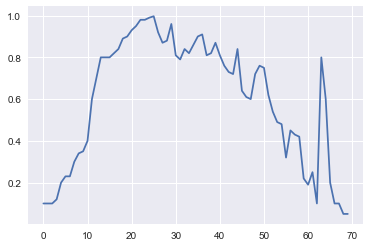

In [664]:
plt.plot([_ for _ in range(len(test[:,0]))],test.ravel())

In [677]:
stats.norm(0, 0.062226452356625161)

In [678]:
kde_test= KernelDensity(kernel='gaussian', bandwidth=15.0).fit(test)
kde_test2 =  KernelDensity(kernel='gaussian', bandwidth=1.0).fit(test)
kde_test3 = KernelDensity(kernel='gaussian', bandwidth=35.0).fit(test)
kde_test4 = KernelDensity(kernel='gaussian', bandwidth=350.0).fit(test)
kde_test5 = KernelDensity(kernel='gaussian', bandwidth=3500.0).fit(test)

In [671]:
kde_test.score(10)

-3.8235501593610826

In [695]:
np.exp(kde_test2.score(20))

1.3666355232673208e-80

In [696]:
np.exp(kde_test.score(20))

0.011523295521543554

In [697]:
np.exp(kde_test3.score(20))

0.0097746725006606968

In [700]:
np.exp(kde_test4.score(20))

0.001138084672744574

In [570]:
sum(kde_test.score(test))

-253.91733859395384

In [571]:
sum(kde_test2.score(test))

-70.323866078960748

In [572]:
sum(kde_test3.score(test))

-313.20522885726103

In [582]:
sum(kde_test4.score_samples(test))

-474.38106981270522

In [580]:
sum(kde_test5.score_samples(test))

-635.56197516449799

In [596]:
kde_test.score()

array([[ 1.68563878]])

In [628]:
kde_test.score_samples()

15.0

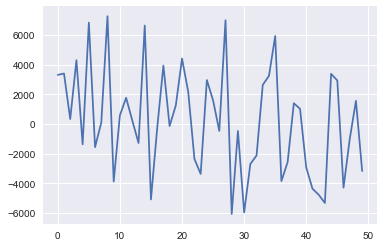

In [681]:
plt.plot(kde_test5.sample(50)[:,0])

In [515]:
>>> from sklearn.neighbors.kde import KernelDensity
>>> import numpy as np
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
>>> kde.score_samples(X)
array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

In [429]:
dict_of_esp_money_market_cpd

{'mmb0_checking0': 0.89866927824582921,
 'mmb0_checking1': 0.03657192392122488,
 'mmb0_cm0': 0.92785182886672712,
 'mmb0_cm1': 0.0073893733003269867,
 'mmb0_cmma0': 0.89602516399535648,
 'mmb0_cmma1': 0.039216038171697561,
 'mmb0_es0': 0.93131412505163191,
 'mmb0_es1': 0.0039270771154221945,
 'mmb0_fx0': 0.9286443086201579,
 'mmb0_fx1': 0.0065968935468961746,
 'mmb0_loc0': 0.92106180356957157,
 'mmb0_loc1': 0.014179398597482552,
 'mmb1_checking0': 0.062226452356625161,
 'mmb1_checking1': 0.0025323454763207069,
 'mmb1_cm0': 0.064247136316580633,
 'mmb1_cm1': 0.00051166151636523839,
 'mmb1_cmma0': 0.062043366260977527,
 'mmb1_cmma1': 0.0027154315719683476,
 'mmb1_es0': 0.064486875688794451,
 'mmb1_es1': 0.00027192214415141695,
 'mmb1_fx0': 0.064302009900015805,
 'mmb1_fx1': 0.00045678793293006176,
 'mmb1_loc0': 0.063776975384320353,
 'mmb1_loc1': 0.00098182244862551654}

In [399]:
vec_0_no_mmb = np.array([dict_of_esp_money_market_cpd['mmb0_checking0'],dict_of_esp_money_market_cpd['mmb0_checking1'],
             dict_of_esp_money_market_cpd['mmb0_cm0'],dict_of_esp_money_market_cpd['mmb0_cm1'],
             dict_of_esp_money_market_cpd['mmb0_cmma0'],dict_of_esp_money_market_cpd['mmb0_cmma1'],
             dict_of_esp_money_market_cpd['mmb0_es0'],dict_of_esp_money_market_cpd['mmb0_es1'],
             dict_of_esp_money_market_cpd['mmb0_fx0'],dict_of_esp_money_market_cpd['mmb0_fx1'],
             dict_of_esp_money_market_cpd['mmb0_loc0'],dict_of_esp_money_market_cpd['mmb0_loc1']])
vec_0_yes_mmb  = np.array([dict_of_esp_money_market_cpd['mmb1_checking0'],dict_of_esp_money_market_cpd['mmb1_checking1'],
             dict_of_esp_money_market_cpd['mmb1_cm0'],dict_of_esp_money_market_cpd['mmb1_cm1'],
             dict_of_esp_money_market_cpd['mmb1_cmma0'],dict_of_esp_money_market_cpd['mmb1_cmma1'],
             dict_of_esp_money_market_cpd['mmb1_es0'],dict_of_esp_money_market_cpd['mmb1_es1'],
             dict_of_esp_money_market_cpd['mmb1_fx0'],dict_of_esp_money_market_cpd['mmb1_fx1'],
             dict_of_esp_money_market_cpd['mmb1_loc0'],dict_of_esp_money_market_cpd['mmb1_loc1']])

In [401]:
vec_0_yes_mmb 

array([  8.74878818e-03,   1.53620659e-05,   8.62576404e-03,
         1.38386210e-04,   8.68733992e-03,   7.68103295e-05,
         8.72734714e-03,   3.68031071e-05,   8.70290030e-03,
         6.12499506e-05,   8.63504725e-03,   1.29102994e-04])

In [459]:
vec_0_dot = vec_0_no_mmb.dot(vec_0_yes_mmb)

In [444]:
vec_0_no_norm = np.linalg.norm(vec_0_no_mmb)

In [453]:
vec_0_yes_norm = np.linalg.norm(vec_0_yes_mmb)

In [393]:
vec_50_no_mmb = np.array([dict_of_esp_money_market_cpd['mmb0_checking0'],dict_of_esp_money_market_cpd['mmb0_checking1'],
             dict_of_esp_money_market_cpd['mmb0_cm0'],dict_of_esp_money_market_cpd['mmb0_cm1'],
             dict_of_esp_money_market_cpd['mmb0_cmma0'],dict_of_esp_money_market_cpd['mmb0_cmma1'],
             dict_of_esp_money_market_cpd['mmb0_es0'],dict_of_esp_money_market_cpd['mmb0_es1'],
             dict_of_esp_money_market_cpd['mmb0_fx0'],dict_of_esp_money_market_cpd['mmb0_fx1'],
             dict_of_esp_money_market_cpd['mmb0_loc0'],dict_of_esp_money_market_cpd['mmb0_loc1']])
vec_50_yes_mmb  = np.array([dict_of_esp_money_market_cpd['mmb1_checking0'],dict_of_esp_money_market_cpd['mmb1_checking1'],
             dict_of_esp_money_market_cpd['mmb1_cm0'],dict_of_esp_money_market_cpd['mmb1_cm1'],
             dict_of_esp_money_market_cpd['mmb1_cmma0'],dict_of_esp_money_market_cpd['mmb1_cmma1'],
             dict_of_esp_money_market_cpd['mmb1_es0'],dict_of_esp_money_market_cpd['mmb1_es1'],
             dict_of_esp_money_market_cpd['mmb1_fx0'],dict_of_esp_money_market_cpd['mmb1_fx1'],
             dict_of_esp_money_market_cpd['mmb1_loc0'],dict_of_esp_money_market_cpd['mmb1_loc1']])

In [397]:
vec_50_yes_mmb

array([  2.33521798e-111,   4.10042760e-114,   2.33931841e-111,
         4.67787829e-127,   2.33931841e-111,   5.47241062e-222,
         2.33073229e-111,   8.58611426e-114,   2.32546039e-111,
         1.38580159e-113,   2.32893924e-111,   1.03791660e-113])

In [458]:
vec_50_dot = vec_50_no_mmb.dot(vec_50_yes_mmb)

In [443]:
vec_50_no_norm = np.linalg.norm(vec_50_no_mmb)

In [452]:
vec_50_yes_norm = np.linalg.norm(vec_50_yes_mmb)

In [382]:
vec_25_no_mmb = np.array([dict_of_esp_money_market_cpd['mmb0_checking0'],dict_of_esp_money_market_cpd['mmb0_checking1'],
             dict_of_esp_money_market_cpd['mmb0_cm0'],dict_of_esp_money_market_cpd['mmb0_cm1'],
             dict_of_esp_money_market_cpd['mmb0_cmma0'],dict_of_esp_money_market_cpd['mmb0_cmma1'],
             dict_of_esp_money_market_cpd['mmb0_es0'],dict_of_esp_money_market_cpd['mmb0_es1'],
             dict_of_esp_money_market_cpd['mmb0_fx0'],dict_of_esp_money_market_cpd['mmb0_fx1'],
             dict_of_esp_money_market_cpd['mmb0_loc0'],dict_of_esp_money_market_cpd['mmb0_loc1']])
vec_25_yes_mmb  = np.array([dict_of_esp_money_market_cpd['mmb1_checking0'],dict_of_esp_money_market_cpd['mmb1_checking1'],
             dict_of_esp_money_market_cpd['mmb1_cm0'],dict_of_esp_money_market_cpd['mmb1_cm1'],
             dict_of_esp_money_market_cpd['mmb1_cmma0'],dict_of_esp_money_market_cpd['mmb1_cmma1'],
             dict_of_esp_money_market_cpd['mmb1_es0'],dict_of_esp_money_market_cpd['mmb1_es1'],
             dict_of_esp_money_market_cpd['mmb1_fx0'],dict_of_esp_money_market_cpd['mmb1_fx1'],
             dict_of_esp_money_market_cpd['mmb1_loc0'],dict_of_esp_money_market_cpd['mmb1_loc1']])

In [457]:
vec_25_dot = vec_25_no_mmb.dot(vec_25_yes_mmb)

In [440]:
vec_25_no_norm = np.linalg.norm(vec_25_no_mmb)

In [467]:
vec_25_yes_norm = np.linalg.norm(vec_25_yes_mmb)

In [468]:
vec_75_no_mmb = np.array([dict_of_esp_money_market_cpd['mmb0_checking0'],dict_of_esp_money_market_cpd['mmb0_checking1'],
             dict_of_esp_money_market_cpd['mmb0_cm0'],dict_of_esp_money_market_cpd['mmb0_cm1'],
             dict_of_esp_money_market_cpd['mmb0_cmma0'],dict_of_esp_money_market_cpd['mmb0_cmma1'],
             dict_of_esp_money_market_cpd['mmb0_es0'],dict_of_esp_money_market_cpd['mmb0_es1'],
             dict_of_esp_money_market_cpd['mmb0_fx0'],dict_of_esp_money_market_cpd['mmb0_fx1'],
             dict_of_esp_money_market_cpd['mmb0_loc0'],dict_of_esp_money_market_cpd['mmb0_loc1']])
vec_75_yes_mmb  = np.array([dict_of_esp_money_market_cpd['mmb1_checking0'],dict_of_esp_money_market_cpd['mmb1_checking1'],
             dict_of_esp_money_market_cpd['mmb1_cm0'],dict_of_esp_money_market_cpd['mmb1_cm1'],
             dict_of_esp_money_market_cpd['mmb1_cmma0'],dict_of_esp_money_market_cpd['mmb1_cmma1'],
             dict_of_esp_money_market_cpd['mmb1_es0'],dict_of_esp_money_market_cpd['mmb1_es1'],
             dict_of_esp_money_market_cpd['mmb1_fx0'],dict_of_esp_money_market_cpd['mmb1_fx1'],
             dict_of_esp_money_market_cpd['mmb1_loc0'],dict_of_esp_money_market_cpd['mmb1_loc1']])
vec_75_dot = vec_75_no_mmb.dot(vec_75_yes_mmb)
vec_75_no_norm = np.linalg.norm(vec_75_no_mmb)
vec_75_yes_norm = np.linalg.norm(vec_75_yes_mmb)

In [476]:
vec_0_no_mmb = np.array([dict_of_esp_money_market_cpd['mmb0_checking0'],dict_of_esp_money_market_cpd['mmb0_checking1'],
             dict_of_esp_money_market_cpd['mmb0_cm0'],dict_of_esp_money_market_cpd['mmb0_cm1'],
             dict_of_esp_money_market_cpd['mmb0_cmma0'],dict_of_esp_money_market_cpd['mmb0_cmma1'],
             dict_of_esp_money_market_cpd['mmb0_es0'],dict_of_esp_money_market_cpd['mmb0_es1'],
             dict_of_esp_money_market_cpd['mmb0_fx0'],dict_of_esp_money_market_cpd['mmb0_fx1'],
             dict_of_esp_money_market_cpd['mmb0_loc0'],dict_of_esp_money_market_cpd['mmb0_loc1']])
vec_0_yes_mmb  = np.array([dict_of_esp_money_market_cpd['mmb1_checking0'],dict_of_esp_money_market_cpd['mmb1_checking1'],
             dict_of_esp_money_market_cpd['mmb1_cm0'],dict_of_esp_money_market_cpd['mmb1_cm1'],
             dict_of_esp_money_market_cpd['mmb1_cmma0'],dict_of_esp_money_market_cpd['mmb1_cmma1'],
             dict_of_esp_money_market_cpd['mmb1_es0'],dict_of_esp_money_market_cpd['mmb1_es1'],
             dict_of_esp_money_market_cpd['mmb1_fx0'],dict_of_esp_money_market_cpd['mmb1_fx1'],
             dict_of_esp_money_market_cpd['mmb1_loc0'],dict_of_esp_money_market_cpd['mmb1_loc1']])
vec_0_dot = vec_75_no_mmb.dot(vec_0_yes_mmb)
vec_0_no_norm = np.linalg.norm(vec_0_no_mmb)
vec_0_yes_norm = np.linalg.norm(vec_0_yes_mmb)

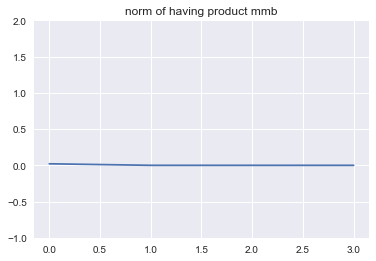

In [475]:
plt.plot(np.array([vec_0_yes_norm,vec_25_yes_norm,vec_50_yes_norm,vec_75_yes_norm]))
plt.ylim(-1,2)
plt.title('norm of having product mmb')

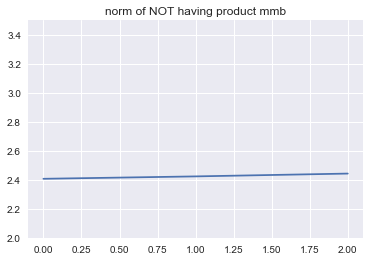

In [470]:
plt.plot(np.array([vec_0_no_norm,vec_25_no_norm,vec_50_no_norm]))
plt.ylim(2.0,3.5)
plt.title('norm of NOT having product mmb')

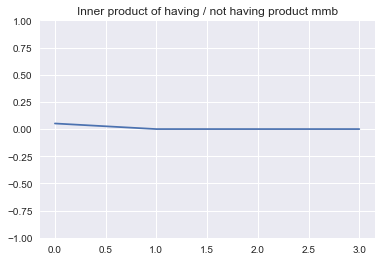

In [477]:
plt.plot(np.array([vec_0_dot,vec_25_dot,vec_50_dot, vec_75_dot]))
plt.ylim(-1,1)
plt.title('Inner product of having / not having product mmb')

In [692]:
model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def Esp_Product_Probability_Over_Time(esp_money_market_conditional_probabilities,month_n_one_time= None,
                                      product_name = None,range_of_months=24,evidence_=None):
    """Returns the probability of having a given ESP product during a certain month. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product"""
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    if month_n_one_time != None:
        dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(month_n_one_time) 

        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                        cardinality=[2, 2],
                        values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                    dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                    dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                    dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                    dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                    dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                    dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

#             factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
#                                         dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])

#             factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[.4, .6, .3, .7])

#             factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                                 cardinality=[2, 2],
#                                 values=[.2, .8, .9, .1])

#             factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.3, .7, .4, .6])

#             factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.1, .9, .4, .6])

        model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                           factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
        belief_propagation = BeliefPropagation(model)
        if evidence_ == None:
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)
            return 
        else:


            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    else:
        for month_n_loop in range(range_of_months):
            dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(month_n_loop) 

            factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                        dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
            factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                        dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
            factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                        dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
            factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                        dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
            factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                        dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
            factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                        dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

#             factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
#                                         dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])

#             factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[.4, .6, .3, .7])

#             factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                                 cardinality=[2, 2],
#                                 values=[.2, .8, .9, .1])

#             factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.3, .7, .4, .6])

#             factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.1, .9, .4, .6])

            model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                               factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
            belief_propagation = BeliefPropagation(model)
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)

            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])

    plt.figure(figsize=(15,8))
    plt.plot([_ for _ in range( range_of_months)], prob_mmb,label='mmb')
    plt.plot([_ for _ in range( range_of_months)], prob_cmma,label='cmma')
    plt.plot([_ for _ in range( range_of_months)], prob_fx,label='fx')
    plt.plot([_ for _ in range( range_of_months)], prob_loc,label='loc')
    plt.plot([_ for _ in range( range_of_months)], prob_es,label='es')
    plt.plot([_ for _ in range( range_of_months)], prob_checking,label='checking')
    plt.legend()
    
        
        
# fig = plt.plot([i for i in range(50)],have_money_market,label='have money_market_bonus')
# fig.title('Haev money market bonus')

                # factor_cmma_checking,factor_cmma_cm,factor_cmma_fx,factor_cmma_loc,factor_cmma_es )

0.991235849753  mmb0 prob
0.99999851328  cmma 0 prob
0.973004516743  mmb0 prob
0.999866169774  cmma 0 prob
0.935241202167  mmb0 prob
0.995568151588  cmma 0 prob
0.87901463774  mmb0 prob
0.946009033487  cmma 0 prob
0.823967336618  mmb0 prob
0.758029275481  cmma 0 prob
0.800528859799  mmb0 prob
0.601057719599  cmma 0 prob
0.823967336618  mmb0 prob
0.758029275481  cmma 0 prob
0.87901463774  mmb0 prob
0.946009033487  cmma 0 prob
0.935241202167  mmb0 prob
0.995568151588  cmma 0 prob
0.973004516743  mmb0 prob
0.999866169774  cmma 0 prob
0.991235849753  mmb0 prob
0.99999851328  cmma 0 prob
0.997784075794  mmb0 prob
0.999999993924  cmma 0 prob
0.999563658652  mmb0 prob
0.999999999991  cmma 0 prob
0.999933084887  mmb0 prob
1.0  cmma 0 prob
0.999992008129  mmb0 prob
1.0  cmma 0 prob
0.99999925664  mmb0 prob
1.0  cmma 0 prob
0.999999946151  mmb0 prob
1.0  cmma 0 prob
0.999999996962  mmb0 prob
1.0  cmma 0 prob
0.999999999867  mmb0 prob
1.0  cmma 0 prob


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/pgmpy/factors/Factor.py:659: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values


0.999999999995  mmb0 prob
1.0  cmma 0 prob
1.0  mmb0 prob
1.0  cmma 0 prob
1.0  mmb0 prob
1.0  cmma 0 prob
1.0  mmb0 prob
1.0  cmma 0 prob
1.0  mmb0 prob
1.0  cmma 0 prob


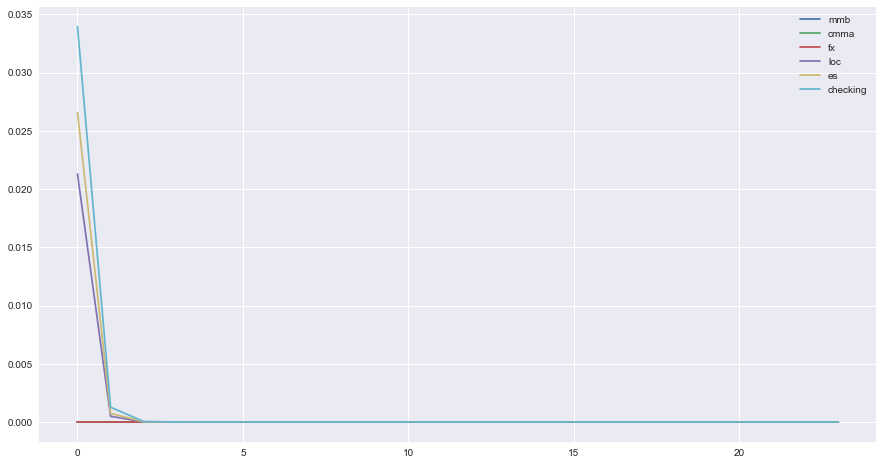

In [693]:
Esp_Product_Probability_Over_Time(Esp_Money_Market_Conditional_Probabilities)

In [249]:
model.get_local_independencies()

(collateral_mma _|_ fx_products, enterprise_sweep, checking_usd, letters_of_credit, cash_management | money_market_bonus)
(checking_usd _|_ fx_products, enterprise_sweep, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(cash_management _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, letters_of_credit | money_market_bonus)
(fx_products _|_ enterprise_sweep, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(letters_of_credit _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, cash_management | money_market_bonus)
(enterprise_sweep _|_ fx_products, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)

In [252]:
from IPython.display import Image
print(factor_mmb_checking)

╒══════════════════════╤════════════════╤════════════════════════════════════════╕
│ money_market_bonus   │ checking_usd   │   phi(money_market_bonus,checking_usd) │
╞══════════════════════╪════════════════╪════════════════════════════════════════╡
│ money_market_bonus_0 │ checking_usd_0 │                                 1.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_0 │ checking_usd_1 │                                 0.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_0 │                                 0.9978 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_1 │                                 0.0022 │
╘══════════════════════╧════════════════╧════════════════════════════════════════╛


In [220]:
belief_propagation = BeliefPropagation(model)

In [221]:
belief = belief_propagation.query(variables=['collateral_mma'])

In [237]:
belief['collateral_mma'].values

array([  1.00000000e+00,   1.35741448e-53])

In [301]:
factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                            dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                            dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                            dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                            dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                            dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                            dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

# factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .5, .5])

# factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.4, .6, .3, .7])

# factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                     cardinality=[2, 2],
#                     values=[.2, .8, .9, .1])

# factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.3, .7, .4, .6])

# factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .4, .6])

model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                   factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'],
                              evidence={'checking_usd':0})

In [302]:
print(model)

In [303]:
tes['cash_management'].values

array([  1.00000000e+000,   1.23750423e-166])

In [304]:
tes['enterprise_sweep'].values

array([  1.00000000e+000,   7.45345104e-161])

In [305]:
tes['money_market_bonus'].values

array([ 0.73019158,  0.26980842])

In [714]:
test_markov = np.array([[.9,.05,.05],
                       [.2,.7,.1],
                       [.03,.27,.7]])

In [726]:
np.linalg.matrix_power(test_markov,15)

array([[ 0.57189067,  0.25095874,  0.17715059],
       [ 0.56098602,  0.25837906,  0.18063492],
       [ 0.5491393 ,  0.26628979,  0.1845709 ]])